In [1]:
from python_scripts.data_and_descriptives import *
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

[*********************100%***********************]  5 of 5 completed

using CLOSING PRICES...
ratio_metric: estimating sharpe_ratio using target of 0.05
using RETURNS...


,annualized_returns,annualized_volatility,sharpe_ratio,max_drawdown
Ticker,,,,
AUSF,0.17,0.14,0.86,0.12
LVHI,0.20,0.11,1.23,0.12
MLPA,0.13,0.16,0.46,0.14
SQLV,0.04,0.21,-0.04,0.27
XLK,0.28,0.25,0.86,0.26


Ticker,AUSF,SQLV,LVHI,XLK,MLPA
Ticker,,,,,
AUSF,1.00,0.82,0.72,0.55,0.59
SQLV,0.82,1.00,0.60,0.60,0.51
LVHI,0.72,0.60,1.00,0.50,0.54
XLK,0.55,0.60,0.50,1.00,0.43
MLPA,0.59,0.51,0.54,0.43,1.00


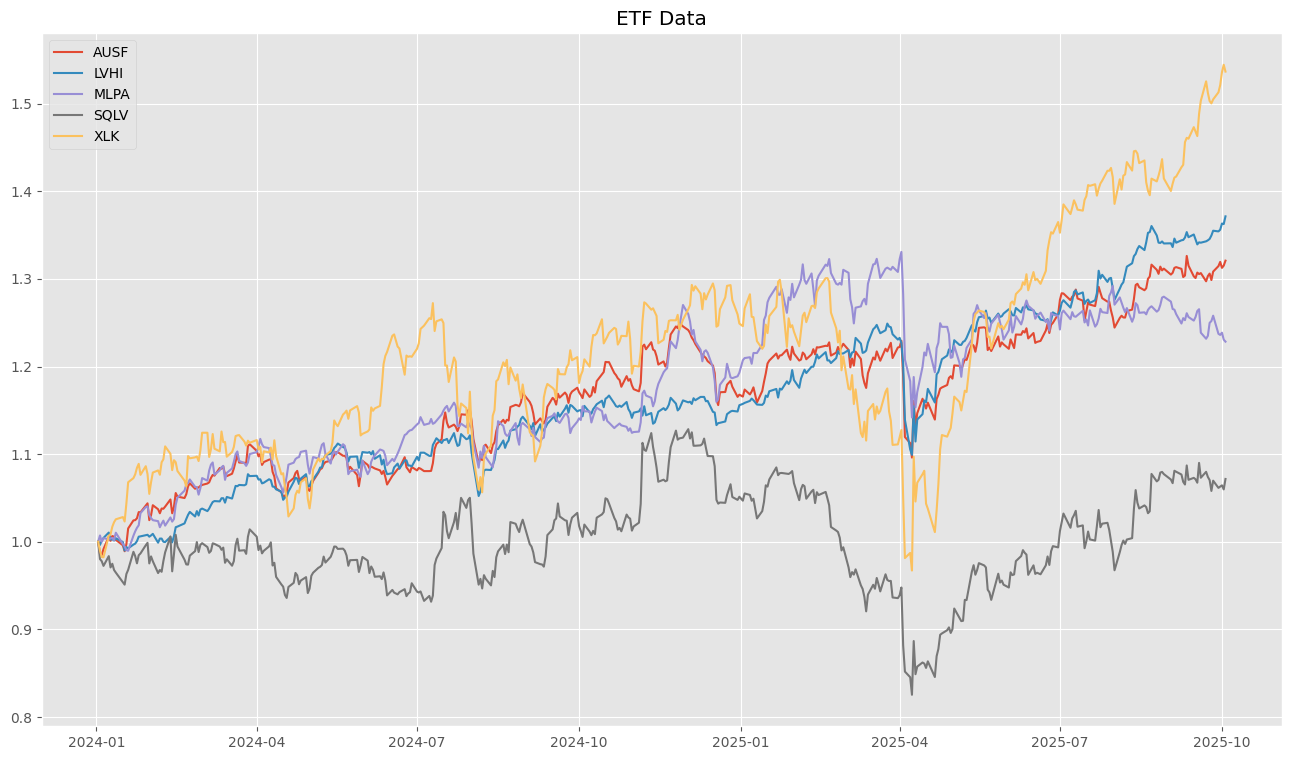

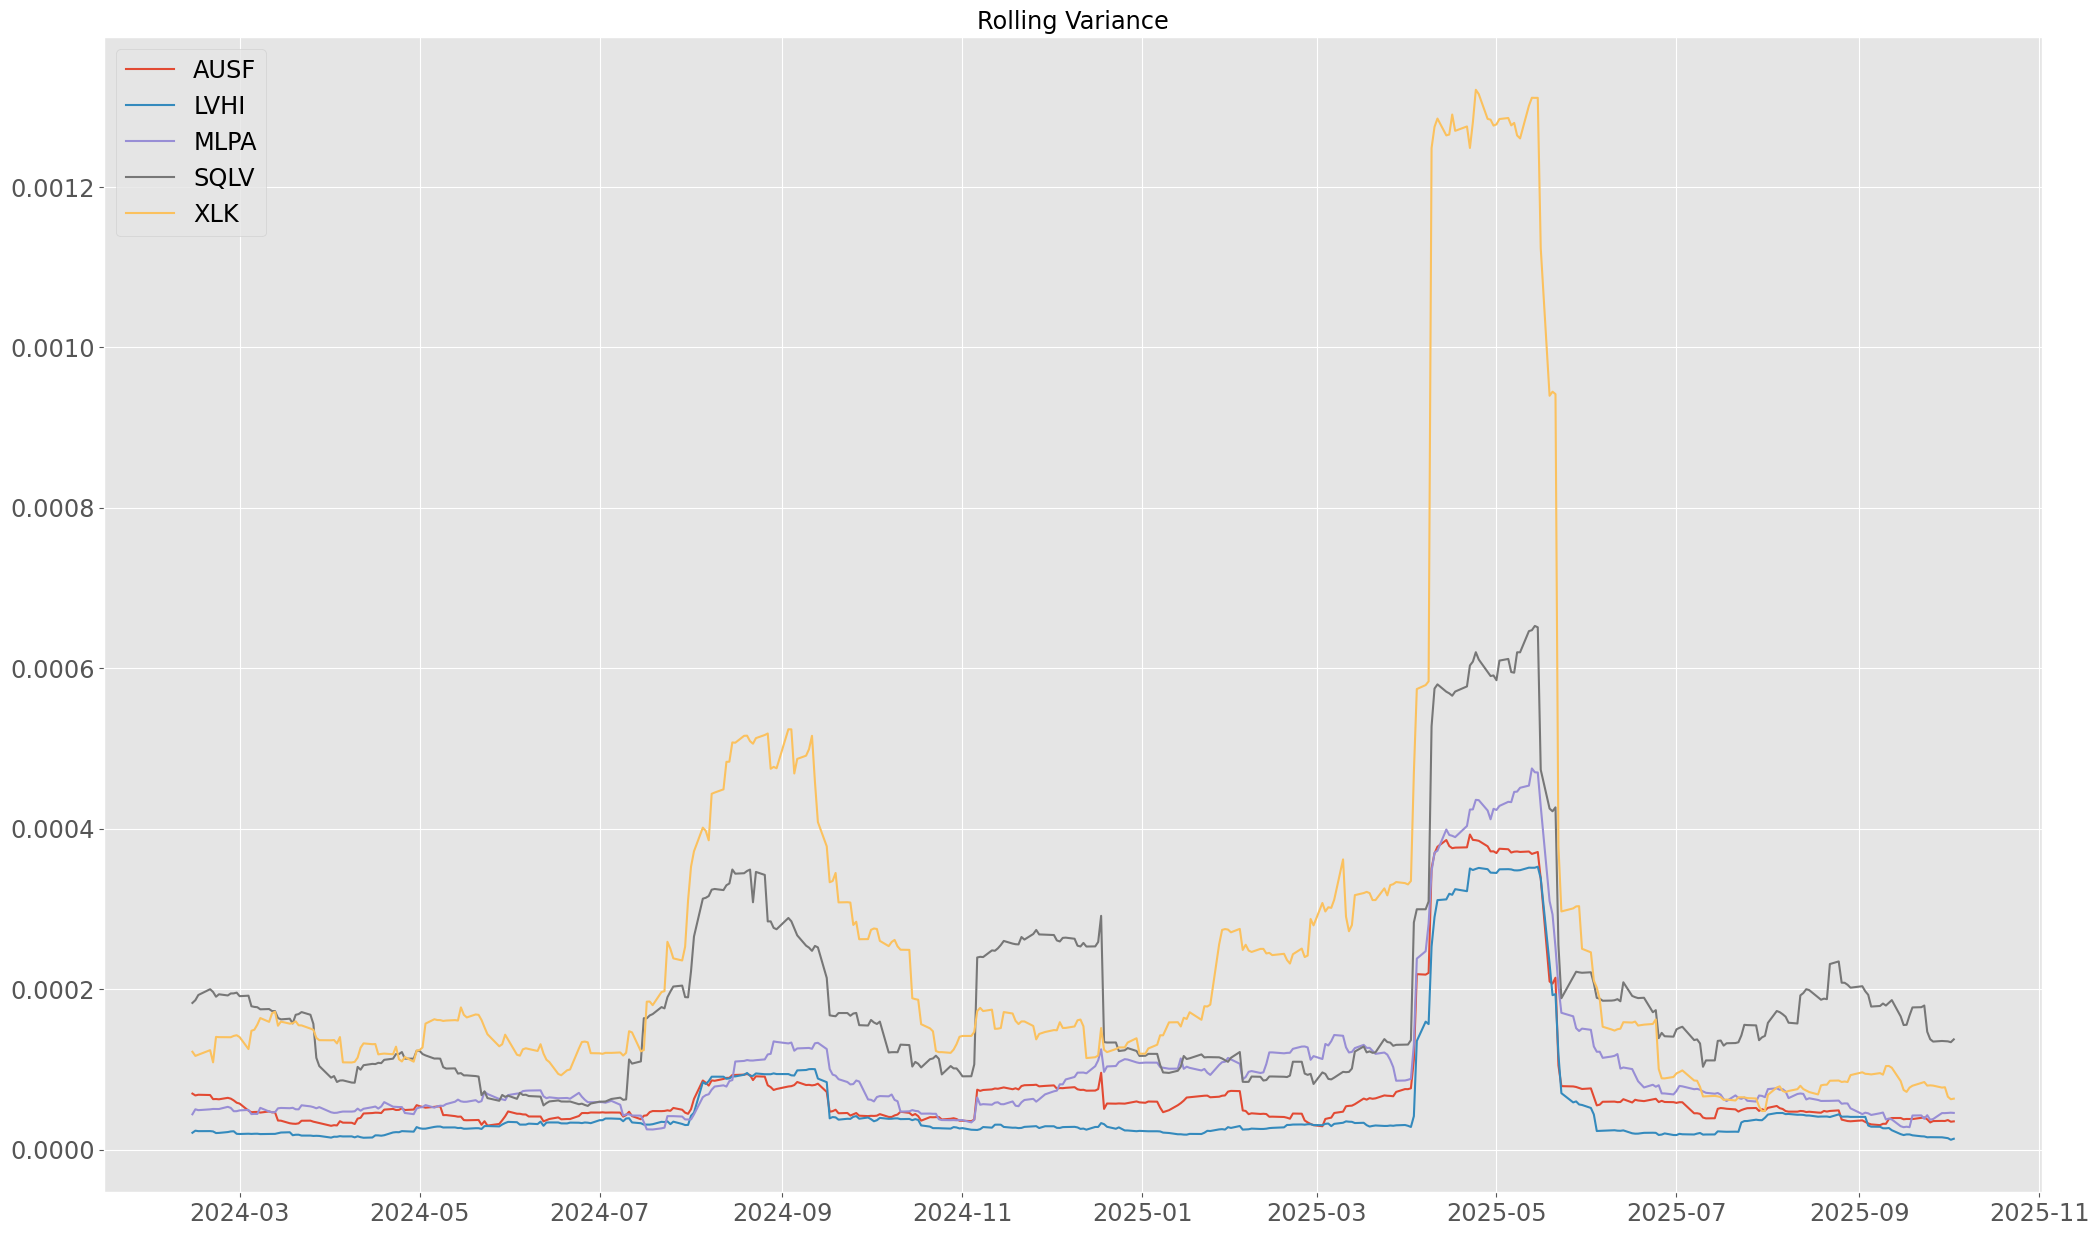

In [2]:
freq = "1d"
rf = 0.0525
tickers = ['AUSF','LVHI', 'SQLV','MLPA','XLK']
#tickers = ['VOO', 'AUSF','LVHI', 'SQLV', 'AIQ', 'YLDE','ALTY', 'SDEM',  'BUG', 'WBND','WINC', 'INFR','COPX', 'URA','GAA','MLPA','PGAL', 'GREK', 'ASEA', 'GXG', 'VAMO', 'CHIE', 'PAK', 'NGE', 'GOEX', 'BKCH', 'MILN', 'GXTG', 'GURU', 'GMOM', 'GVAL', 'SOVB', 'HTUS', 'MGV', 'MGK', 'MGC']
# tickers = ['LINK-USD', 'BTC-USD', 'MATIC-USD', 'ETH-USD', 'DOGE-USD', 'ADA-USD', 'XRP-USD', 'SHIB-USD', 'SOL-USD',
# 'ALGO-USD', 'AVAX-USD', 'XTZ-USD', 'MANA-USD', 'DOT-USD', 'TRX-USD', 'UNI7083-USD', 'ATOM-USD', 'FIL-USD',
#   'HBAR-USD', 'AAVE-USD', 'MIOTA-USD', 'MKR-USD', 'CRV-USD', 'SPY', 'IEZ']
start = '2024-01-01' 
#end = '2020-03-20'
end = date.today()

returns = compare_data(tickers, start, end, freq, clusters=True)

In [3]:
metrics = [(annualized_returns, {}), (annualized_volatility, {}),
                   (ratio_metric, {'metric': 'sharpe_ratio', 'target': TARGET}
                    ), (scipy_metric, {'metric': 'skewness'}),
                   (scipy_metric, {'metric': 'kurtosis'}
                    ), (scipy_metric, {'metric': 'normal_test'}),
                   (cf_value_at_risk, {'percentage': PERCENTAGE}),
                   (ratio_metric, {'metric': 'c_f_var_ratio',
                    'target': TARGET, 'percentage': PERCENTAGE}),
                   (max_drawdown, {}), (ratio_metric, {
                       'metric': 'calmar_ratio', 'target': TARGET}),
                   (modified_burke_drawdown_measure, {}), (ratio_metric, {
                       'metric': 'modified_burke_ratio', 'target': TARGET}),
                   (omega_ratio_put_option, {'target': TARGET}),
                   (sortino_ratio, {'target': TARGET})
                   ]

# try metrics=ALL_ABS_METRICS
results = performance_metrics(returns, metrics, round_to=5)

ratio_metric: estimating sharpe_ratio using target of 0.05
cf_value_at_risk: VaR estimated using a confidence level of: 95.0%
ratio_metric: estimating c_f_var_ratio using target of 0.05
cf_value_at_risk: VaR estimated using a confidence level of: 95.0%
using RETURNS...
ratio_metric: estimating calmar_ratio using target of 0.05
using RETURNS...
using RETURNS...
ratio_metric: estimating modified_burke_ratio using target of 0.05
using RETURNS...
computing lower_partial_moments of order: 1
computing lower_partial_moments of order: 2


,annualized_returns,annualized_volatility,sharpe_ratio,skewness,kurtosis,normal_test,cf_value_at_risk,c_f_var_ratio,max_drawdown,calmar_ratio,modified_burke_drawdown_measure,modified_burke_ratio,omega_ratio_put_option,sortino_ratio
Ticker,,,,,,,,,,,,,,
AUSF,0.17276,0.13644,0.85703,-0.18952,9.95543,0.0,0.01166,10.02520,0.12289,0.95150,0.02892,4.04288,1.17512,0.00621
LVHI,0.19826,0.11472,1.23106,-0.80317,14.19009,0.0,0.01019,13.86532,0.11994,1.17753,0.01897,7.44455,1.26736,0.00768
MLPA,0.12503,0.15591,0.45841,-0.60078,3.80267,0.0,0.01588,4.49999,0.14199,0.50336,0.04110,1.73902,1.09524,0.00384
SQLV,0.04042,0.21423,-0.04262,0.32207,4.80311,0.0,0.01854,-0.49246,0.26865,-0.03399,0.09076,-0.10061,1.01149,0.00057
XLK,0.27894,0.25355,0.86009,0.65827,12.05173,0.0,0.01718,12.69536,0.25656,0.84999,0.06391,3.41213,1.18503,0.00872
